In [1]:
from sklearn.datasets import load_iris

In [2]:
dataset=load_iris()

In [3]:
import pandas as pd
import numpy as np


In [9]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [10]:
df['target']=dataset.target

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df_copy=df[df['target']!=2]

In [13]:
df_copy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [16]:
from sklearn.model_selection import train_test_split

In [21]:
X=df_copy.iloc[:,:-1]
y=df_copy.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression

In [26]:
classification=LogisticRegression()

In [28]:
classification

LogisticRegression()

In [29]:
classification.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred=classification.predict(X_test)

In [32]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [34]:
print(confusion_matrix(y_test,y_pred))

[[12  0]
 [ 0  8]]


In [36]:
print(accuracy_score(y_test,y_pred))

1.0


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [38]:
from sklearn.model_selection import KFold

In [40]:
cv=KFold(n_splits=5,shuffle=True)

In [41]:
from sklearn.model_selection import cross_val_score

In [46]:
cross_val_score(classification,X_train,y_train,scoring='accuracy',cv=cv)

array([1., 1., 1., 1., 1.])

In [47]:
classification

LogisticRegression()

In [48]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [50]:
parameters={'penalty':('l1','l2','elasticnet'),'C':[1,10,20,30]}

In [52]:
clf=GridSearchCV(classification,param_grid=parameters,cv=5)

In [53]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20, 30],
                         'penalty': ('l1', 'l2', 'elasticnet')})

In [54]:
clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [55]:
clf.best_score_

1.0

In [56]:
classifier=LogisticRegression(C=1,penalty='l2')

In [57]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1)

In [58]:
y_pred=classifier.predict(X_test)

In [59]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [60]:
classifier.predict_proba(X_test)

array([[0.00118085, 0.99881915],
       [0.01580857, 0.98419143],
       [0.00303433, 0.99696567],
       [0.96964813, 0.03035187],
       [0.94251523, 0.05748477],
       [0.97160984, 0.02839016],
       [0.99355615, 0.00644385],
       [0.03169836, 0.96830164],
       [0.97459743, 0.02540257],
       [0.97892756, 0.02107244],
       [0.95512297, 0.04487703],
       [0.9607199 , 0.0392801 ],
       [0.00429472, 0.99570528],
       [0.9858324 , 0.0141676 ],
       [0.00924893, 0.99075107],
       [0.98144334, 0.01855666],
       [0.00208036, 0.99791964],
       [0.00125422, 0.99874578],
       [0.97463766, 0.02536234],
       [0.96123726, 0.03876274]])

In [61]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        12\n           1       1.00      1.00      1.00         8\n\n    accuracy                           1.00        20\n   macro avg       1.00      1.00      1.00        20\nweighted avg       1.00      1.00      1.00        20\n'

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
classifier=DecisionTreeClassifier(criterion='entropy')

In [72]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [73]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [74]:
from sklearn import tree

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\nentropy = 0.918\nsa

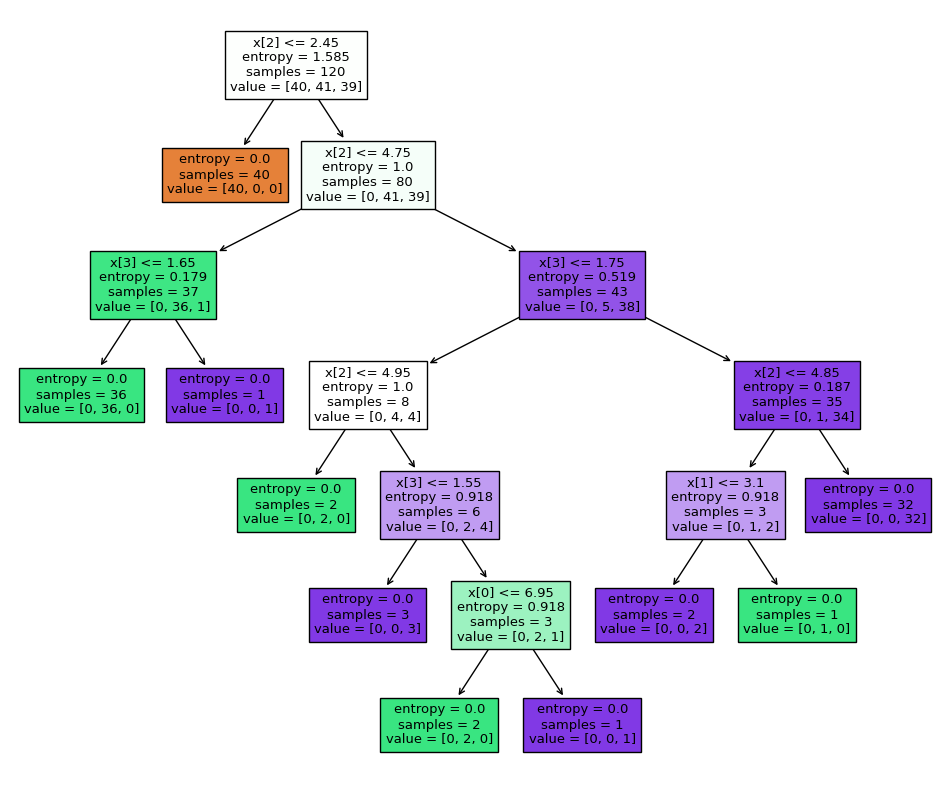

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [ ]:
# Post pruninng 


In [76]:
y_pred=classifier.predict(X_test)

In [77]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [78]:
import warnings
warnings.filterwarnings("ignore")